-20 points

A couple things: it seems like you've worked with Python before - almost everything in this file is beyond the scope of this class. I don't believe even numpy is covered. With that said, you're missing many of the elements requested by the prompt, mainly the core for loops and a list of average total profit for each order quantity as covered in class. While these aren't necessarily required, the main objective was to assist in decision making, i.e., what is the optimal order quantity? Without that being answered, the rubric deducts points.

In [1]:
class Params(object):
    def __init__(
        self, 
        SeasonSalePrice = 15, 
        PostSeasonSalePrice = 75, 
        MaxOQ = 600, 
        MinOQ = 400, 
        MinDemand = 400, 
        MaxDemand = 600, 
        BuyPrice = 50,
        grid_dim = 10,
    ):
        self.SeasonSalePrice = SeasonSalePrice 
        self.PostSeasonSalePrice = PostSeasonSalePrice 
        self.MaxOQ = MaxOQ 
        self.MinOQ = MinOQ 
        self.MinDemand = MinDemand 
        self.MaxDemand = MaxDemand 
        self.BuyPrice = BuyPrice
        self.grid_dim = grid_dim

In [2]:
def compute_profit(args, demand, quantity):
    season_sales = np.minimum(demand, quantity)
    post_season_sales = np.maximum(quantity-demand, 0)
    return quantity*args.BuyPrice - season_sales*args.SeasonSalePrice - post_season_sales*args.PostSeasonSalePrice

In [3]:
args = Params(grid_dim = 20)
import numpy as np
xx, yy = np.meshgrid(
    np.linspace(args.MinOQ, args.MaxOQ, args.grid_dim),
    np.linspace(args.MinDemand, args.MaxDemand, args.grid_dim)
)

zz = compute_profit(args, xx, yy)

This is how the total profit varies with quantity and demand. The peak is obviously where demand and quantity are at a maximum, and equal. The 3d plot appears to map out a triangle in 3d, which is cut off by a sharp line corresponding to where order quantity = seasonal demand. If we plot the countour in 2d, we see this is not the case - rather, our maximum is along the line we see in 3d, and the fact that profit decreases keeps the line hidden. If we rotate the 3d plot, we can see it better.

The line corresponds to order quantity = demand - the less steep half of the plot is where you run out of stock during the season, and the steeper half of the plot is where you have too much stock.

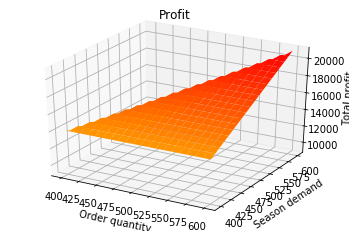

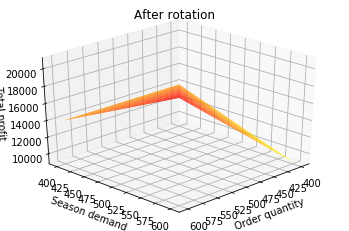

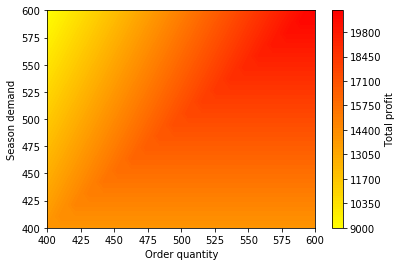

In [5]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure().add_subplot(111, projection="3d")
ax.plot_surface(xx, yy, zz, cmap="autumn_r", lw=0.5, rstride=1, cstride=1)
ax.set_xlabel('Order quantity')
ax.set_ylabel('Season demand')
ax.set_title('Profit')
ax.set_zlabel('Total profit')
plt.show()

ax = plt.figure().add_subplot(111, projection="3d")
ax.plot_surface(xx, yy, zz, cmap="autumn_r", lw=0.5, rstride=1, cstride=1)
ax.set_xlabel('Order quantity')
ax.set_ylabel('Season demand')
ax.set_title('After rotation')
ax.set_zlabel('Total profit')
ax.view_init(30, 45)
plt.show()

plt.contourf(xx, yy, zz, 100, cmap="autumn_r")
plt.xlabel('Order quantity')
plt.ylabel('Season demand')
ax.set_title('Profit density plot')
plt.colorbar(label='Total profit')
plt.show()
